In [82]:
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [40]:
def run_model(matter, t=int(1e6), secondary_decay_ratio=0):  # matter - [[weight, half_life], ...], t - emulation time
    ts = list(range(t+1))
    ys = []
    for t in ts:
      ys.append(0)
      for indx in range(len(matter)):
        weight, half_life = matter[indx]
        dv = weight / 2 / half_life
        matter[indx][0] -= dv
        ys[-1] += dv
      for indx in range(len(matter)):
        matter[indx][0] += ys[-1] * secondary_decay_ratio / len(matter)
    return ts, ys


def get_error(f, ts, ys, params):
  errors = [(f(t, *params) - y)**2 for t, y in zip(ts, ys)]
  return sum(errors)


def print_fit_error(f, ts, ys, p0=None):
  (a, b), _ = scipy.optimize.curve_fit(hyperbolic,  ts,  ys,  p0=p0)
  print(get_error(f, ts, ys, (a, b)))


def hyperbolic(t, a, b):
    return a / (t - b)


def exponential(t, a, b):
    return a * np.exp(b * t)


def drop_points(ts, ys, drop_n):
    if drop_n > 0:
        return ts[drop_n:], ys[drop_n:]
    else:
        return ts[:-drop_n], ys[:-drop_n]


def plot_log(*args):
    plt.yscale("log")
    #for ts, ys in np.array_split(args, 2):
    for ys in args:
        plt.plot(sorted(ys))
    plt.show()

In [30]:
# hyperbola is not much better than exponent
matter = [[1.0, 2**(i/2)] for i in range(54)]  # half life from 1 sec to 1e8
ts, ys = run_model(matter)
print_fit_error(hyperbolic, ts, ys, (1, 0.1))
print_fit_error(exponential, ts, ys, (1, -1))

6.0355889069195126
5.854727916700637


In [31]:
# how hyperbola fit if we drop some points - now it is OK
drop_first_seconds = 10
ts, ys = drop_points(ts, ys, drop_first_seconds)
print_fit_error(hyperbolic, ts, ys, (1, 0.1))
print_fit_error(exponential, ts, ys, (1, -1))

1.682295336896451e-10
0.7921897051176392


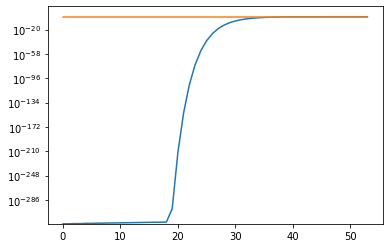

In [32]:
# distribution of isotopes after initial time
ts, ys = run_model(matter, t=drop_first_seconds)
plot_log([el[0] for el in matter], [1 for _ in range(len(matter))])

In [79]:
# non-linear distribution
matter = [[1.0+0.9*math.sin(i/6), 2**(i/2)] for i in range(54)]  # half life from 1 sec to 1e8
ts, ys = run_model(matter)
ts, ys = drop_points(ts, ys, drop_first_seconds)
print_fit_error(hyperbolic, ts, ys, (1, 0.1))
print_fit_error(exponential, ts, ys, (1, -1))

0.015673559344097393
3.263046034032408


In [80]:
# secondary decay
matter = [[1.0, 2**(i/2)] for i in range(54)]  # half life from 1 sec to 1e8
ts, ys = run_model(matter, secondary_decay_ratio=0.9)
ts, ys = drop_points(ts, ys, drop_first_seconds)
print_fit_error(hyperbolic, ts, ys, (1, 0.1))
print_fit_error(exponential, ts, ys, (1, -1))

0.012450354806950985
1.6309411502787503


In [91]:
# random isotope amounts
random.seed(0)
matter = [[random.random(), 2**(i*2)] for i in range(14)]  # half life from 1 sec to 1e8 - 4x times less isotopes
ts, ys = run_model(matter, secondary_decay_ratio=0.9)
ts, ys = drop_points(ts, ys, drop_first_seconds)
print_fit_error(hyperbolic, ts, ys, (1, 0.1))
print_fit_error(exponential, ts, ys, (1, -1))

0.00046292132073517023
0.029670600626408434
